# Fashion MNIST Image Classification
## ST1504 Deep Learning CA1 Part A

##### Name: Haja Amir Rahman
##### Class: DAAA/FT/2B/06
##### Admin Number: P2100803

## References:
- [ResNet50](https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691)
- [Flipping & cropping images](https://www.tensorflow.org/api_docs/python/tf/image/flip_left_right)

<h4><b>Notebook Contents:</b></h4>
1. Data Exploration/Background Research<br>
2. Data Augmentation/Feature Engineering<br>
3. Modelling & Evaluation<br>
4. Model Improvement<br>

<h3><b>1. Data Exploration/ Background Research</b></h3>

The Fashion MNIST Dataset is a dataset of Zalando's images, with 60000 examples for training and 10000 examples for testing. Each example is a 28x28 greyscale image, with 10 associated labels.

* Import all modules
* Load dataset
* Rescale test and train images

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import keras
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import layers
from tensorflow.keras import Sequential
from matplotlib import pyplot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Train-test-split and Normalization

In [5]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, shuffle=False)
x_test = x_test/255
x_val = x_val/255
x_train = x_train/255

In [6]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(54000, 28, 28) (54000,)
(6000, 28, 28) (6000,)
(10000, 28, 28) (10000,)


* 54000 images of 28 pixels by 28 pixels for training and 54000 labels to pair with the images

* 6000 images of 28 x 28 for validation and 6000 labels

* 10000 images of 28 pixels by 28 pixels for testing and 10000 labels to pair with the images

- 28x28 image loaded

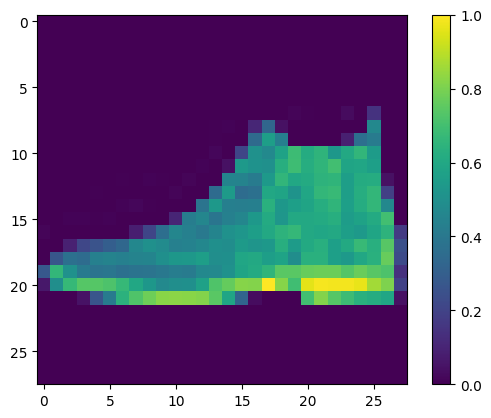

In [7]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# import matplotlib.pyplot as plt

# NUM_ROW = 6               # CHANGE THIS
# NUM_COL = 5               # CHANGE THIS
# WIDTH = 14                # CHANGE THIS
# HEIGHT = 14               # CHANGE THIS

# fig, ax = plt.subplots(NUM_ROW, NUM_COL, figsize=(WIDTH, HEIGHT))
# row_i = 0
# col_i = 0

# for i in range(30):        # CHANGE THIS

#     img = x_train[i]
#     label = y_train[i]
    
#     ax[row_i, col_i].imshow(img, cmap=plt.cm.binary)
#     ax[row_i, col_i].set_title(f"{class_names[label]}")
#     ax[row_i, col_i].axis("off")

#     col_i += 1
#     if col_i > NUM_COL-1:
#         row_i += 1
#         col_i = 0
        
# plt.show()

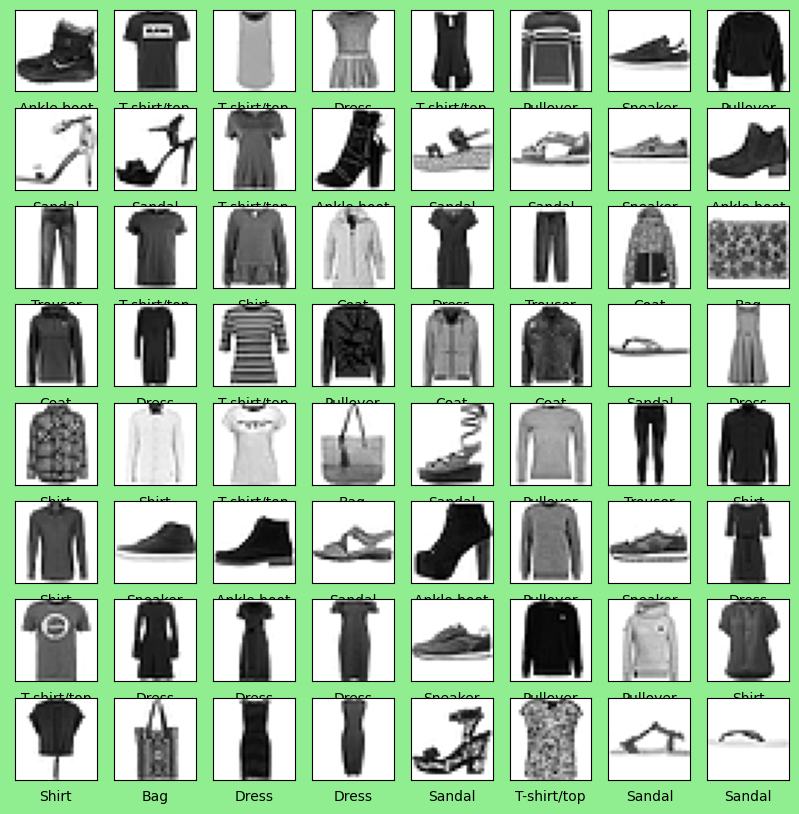

In [9]:
plt.figure(figsize=(10,10),facecolor="lightgreen")
for i in range(64): # 64 imgs
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel(class_names[y_train[i]])
plt.show()

<h2>Objectives/Tasks</h2>

* Be able to accurately identify the test images fed to the model
* Get highest possible accuracy and loss (>95% accuracy)
* Use regularization methods, data augmentation and different model architecture to reduce overfitting while improving accuracy and loss

<h3><b>2. Data Augmentation</h3></b>

* Defined function to execute flipping and tilting on training images

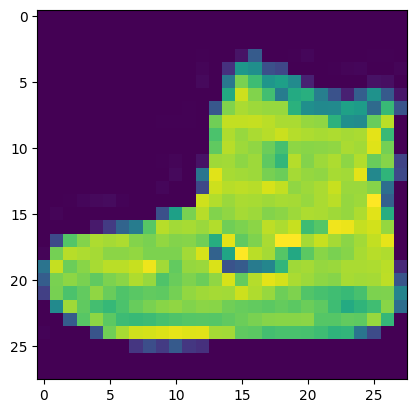

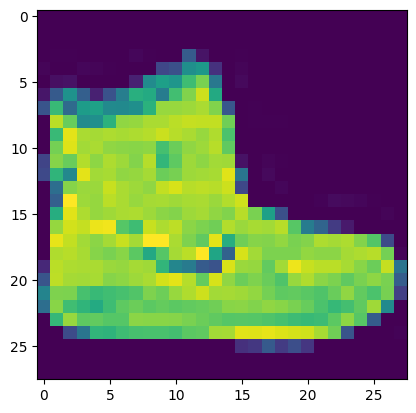

In [10]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(tf.image.flip_left_right(x_train[0].reshape((*x_train[0].shape,1))))
plt.show()

(54000, 28, 28)


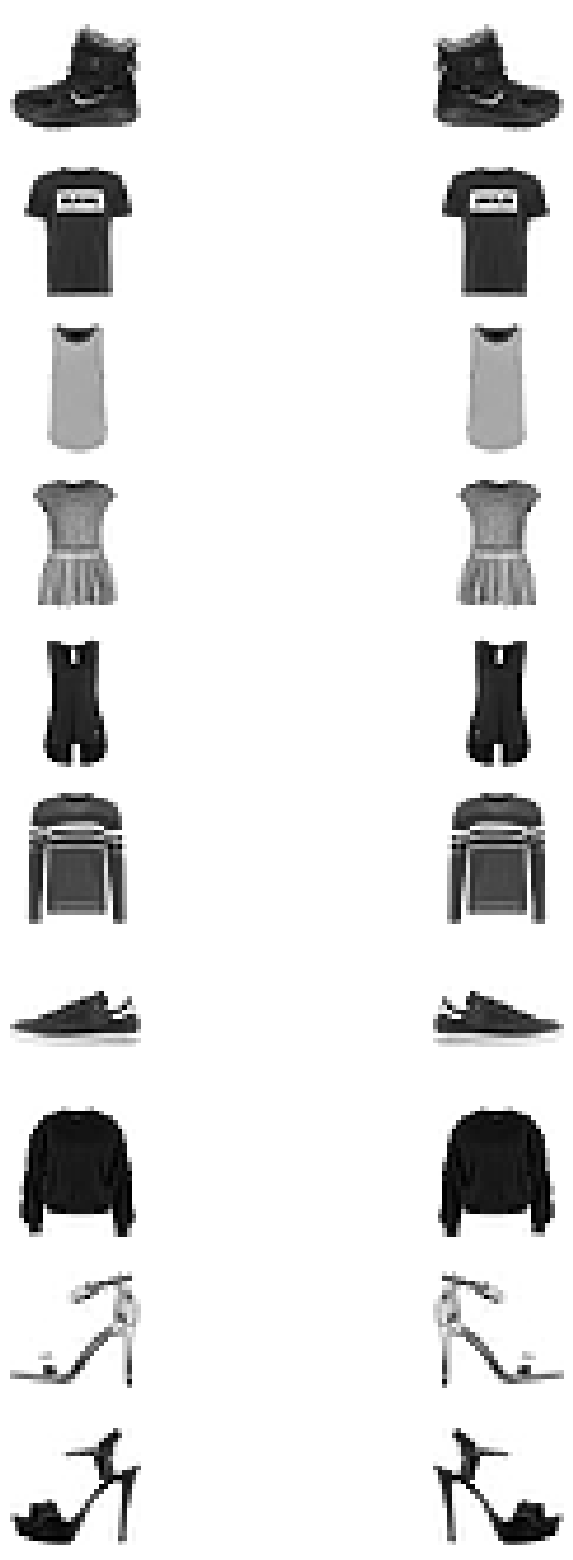

In [11]:
def flipall(images):
    images = images.reshape((*images.shape,1))
    images = tf.image.flip_left_right(images).numpy()
    images = images.reshape(images.shape[:3])

    return images
    
x_train_flipped = flipall(x_train)
print(x_train_flipped.shape)

WIDTH = 10                # CHANGE THIS
HEIGHT = 20               # CHANGE THIS

fig, ax = plt.subplots(10, 2, figsize=(WIDTH, HEIGHT))

for i in range(10):        # CHANGE THIS
    
    img1 = x_train[i]    
    ax[i, 0].imshow(img1, cmap=plt.cm.binary)
    ax[i, 0].axis("off")
    
    img2 = x_train_flipped[i]    
    ax[i, 1].imshow(img2, cmap=plt.cm.binary)
    ax[i, 1].axis("off")
        
plt.show()
    

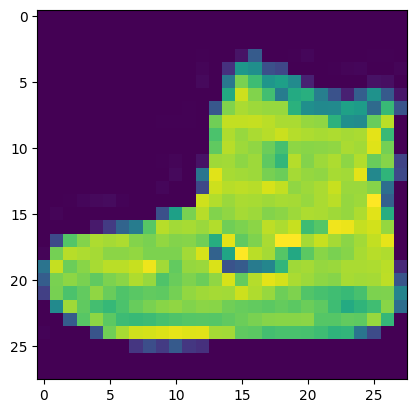

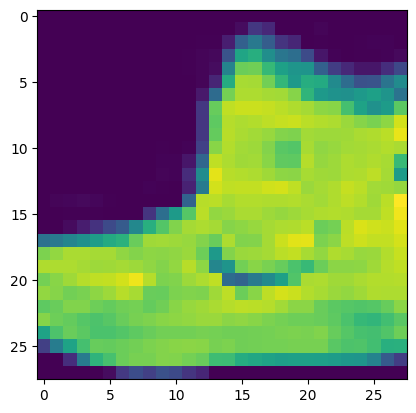



(54000, 28, 28)


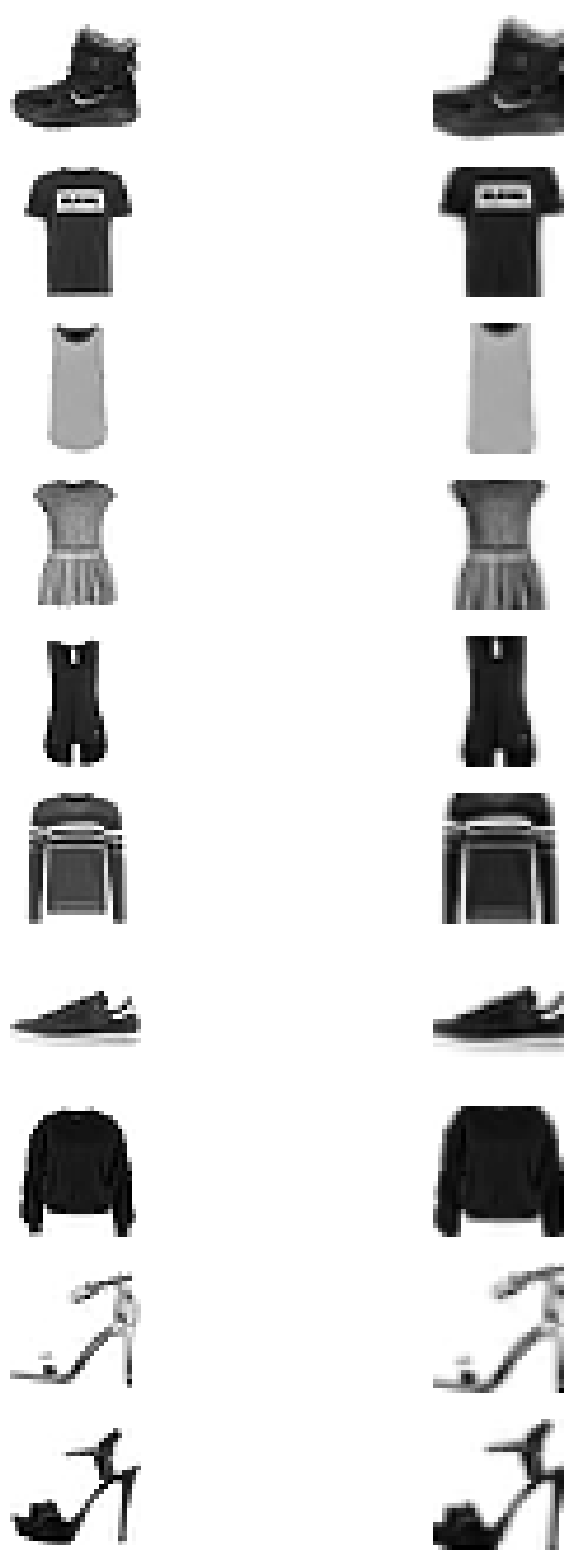

In [12]:
def cropall(images):
    images = images.reshape((*images.shape,1))
    images = tf.image.central_crop(images, 0.8)
    images = tf.image.resize(images, (28,28))
    images = images.numpy().reshape(images.shape[:3])

    return images

cropped_test = cropall(x_train[0])
plt.imshow(x_train[0])
plt.show()
plt.imshow(cropped_test)
plt.show()

print("\n"+"="*50+"\n")
    
x_train_cropped = cropall(x_train)
print(x_train_cropped.shape)

WIDTH = 10                # CHANGE THIS
HEIGHT = 20               # CHANGE THIS

fig, ax = plt.subplots(10, 2, figsize=(WIDTH, HEIGHT))

for i in range(10):        # CHANGE THIS
    
    img1 = x_train[i]    
    ax[i, 0].imshow(img1, cmap=plt.cm.binary)
    ax[i, 0].axis("off")
    
    img2 = x_train_cropped[i]    
    ax[i, 1].imshow(img2, cmap=plt.cm.binary)
    ax[i, 1].axis("off")
        
plt.show()

# Simple Baseline Model

In [13]:
baseline_model = Sequential([
    layers.Conv2D(32, (2,2), activation="relu", input_shape=(28, 28, 1)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(16, activation="relu"),
    layers.Dense(10)
])

baseline_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(baseline_model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline_Acc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline_Loss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
baseline_model_history = baseline_model.fit(x_train, y_train, 
                                                epochs=10, 
                                                validation_data=(x_val, y_val),
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                EarlyStopping(monitor='val_accuracy', mode='max',patience=5)])

baseline_model_history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 16)                373264    
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 373,594
Trainable params: 373,594
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1678/1688 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.8385
Epoch 1: saving model to tmp/checkpoint\baseline.hdf5

Epoch 1: val_accuracy im

In [14]:
# evaluating baseline coarse model
print(baseline_model.evaluate(x_test, y_test))
baseline_model.load_weights('tmp/checkpoint/baseline_Acc.hdf5')
scoreAcc = baseline_model.evaluate(x_test, y_test)
baseline_model.load_weights('tmp/checkpoint/baseline_Loss.hdf5')
scoreLoss = baseline_model.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.8940
[0.35165828466415405, 0.8939999938011169]
313/313 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.8872
Best Acc Test Loss: 0.33393171429634094
Best Acc Test Accuracy: 89.23 %
Best Loss Test Loss: 0.32405927777290344
Best Loss Test Accuracy: 88.72 %


## Baseline Training and validation Accuracy

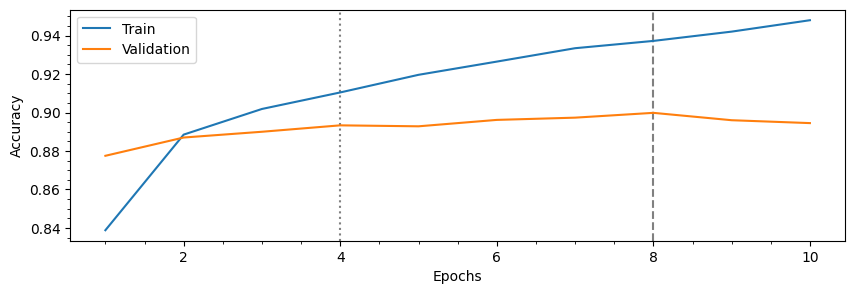

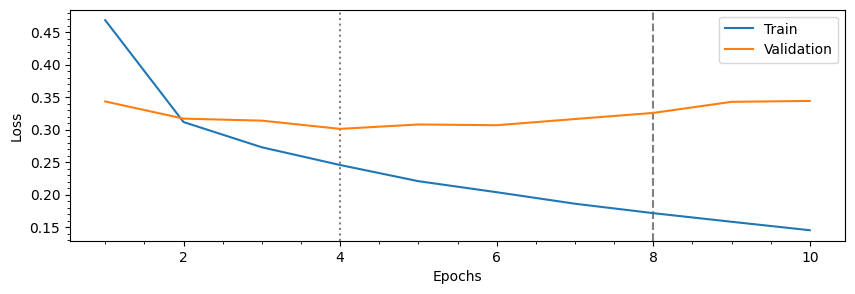

In [15]:
max_val_acc_epoch = np.argmax(list(baseline_model_history.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(baseline_model_history.history['val_loss']))+1
epochs = range(1, len(baseline_model_history.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,baseline_model_history.history['accuracy'], label='Train')
plt.plot(epochs,baseline_model_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,baseline_model_history.history['loss'], label='Train')
plt.plot(epochs,baseline_model_history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

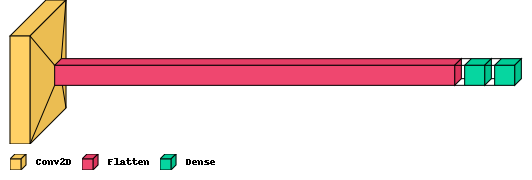

In [16]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(baseline_model, legend=True)

In [17]:
# model.save_weights("./tmp/fashion-baseline-model.h5")

<h3><b>3. Modelling & Evaluation</h3></b>

<h3>Metrics Used</h3>

* Top 1 accuracy
* Top 3 accuracy
* Loss

# Own model

In [19]:
own_model = Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),  
    layers.Conv2D(64, (3,3), activation="relu"),  
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Conv2D(64, (3,3), activation="relu"),  
    layers.BatchNormalization(),  
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(), # 2d to 1d
    layers.Dense(64, activation="relu"),
    layers.Dense(10)
])

own_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(own_model.summary())
#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/ownModel.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/ownModelAcc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/ownModelLoss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
own_model_history = own_model.fit(x_train, y_train, 
                                                epochs=20, 
                                                validation_data=(x_val, y_val), 
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                early_stop, rlrop])

own_model_history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

In [20]:
# evaluating baseline coarse model
print(own_model.evaluate(x_test, y_test))
own_model.load_weights('tmp/checkpoint/ownModelAcc.hdf5')
scoreAcc = own_model.evaluate(x_test, y_test)
own_model.load_weights('tmp/checkpoint/ownModelLoss.hdf5')
scoreLoss = own_model.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2447 - accuracy: 0.9131
[0.24468688666820526, 0.913100004196167]
313/313 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.9131
Best Acc Test Loss: 0.30258360505104065
Best Acc Test Accuracy: 92.45 %
Best Loss Test Loss: 0.24468688666820526
Best Loss Test Accuracy: 91.31 %


## Own model Training and validation Accuracy & Loss

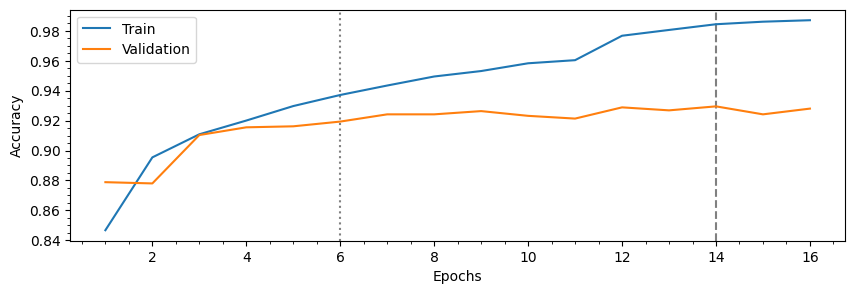

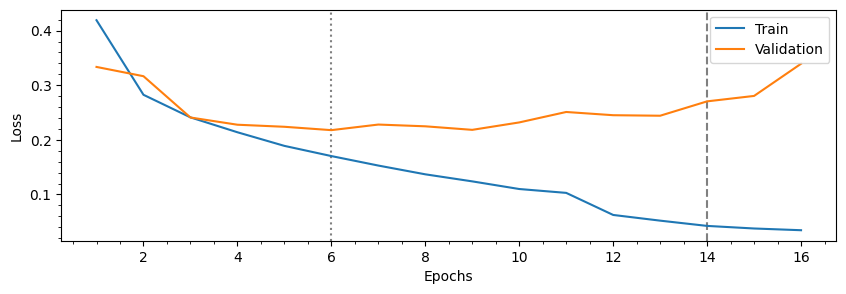

In [21]:
max_val_acc_epoch = np.argmax(list(own_model_history.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(own_model_history.history['val_loss']))+1
epochs = range(1, len(own_model_history.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,own_model_history.history['accuracy'], label='Train')
plt.plot(epochs,own_model_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,own_model_history.history['loss'], label='Train')
plt.plot(epochs,own_model_history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

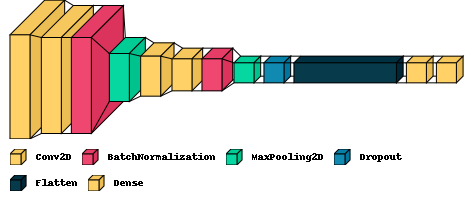

In [22]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(own_model, legend=True)

In [23]:
# own_model.save_weights("./models/fashion-own-model.h5")

<h3><b>4. Model Improvement with augmented data</h3></b>

In [24]:
x_train_augmented = list(x_train) + list(x_train_flipped) + list(x_train_cropped)
x_train_augmented = np.array(x_train_augmented)

y_train_augmented = np.array(list(y_train) * 3)

x_train_augmented.shape, y_train_augmented.shape

((162000, 28, 28), (162000,))

In [25]:
baseline_augmented_model = Sequential([
    layers.Conv2D(64, (4,4), activation="relu", input_shape=(28, 28, 1)),
    #layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(128, activation="relu"),
    layers.Dense(10)
])

#copy pasted from documentation
baseline_augmented_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(baseline_augmented_model.summary())

checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline_augmented.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline_augmentedAcc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/baseline_augmentedLoss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
baseline_augmented_history = baseline_augmented_model.fit(x_train_augmented, y_train_augmented, 
                                                epochs=10, 
                                                validation_data=(x_val, y_val), 
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                EarlyStopping(monitor='val_accuracy', mode='max',patience=5)])


baseline_augmented_history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 25, 25, 64)        1088      
                                                                 
 flatten_3 (Flatten)         (None, 40000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               5120128   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 5,122,506
Trainable params: 5,122,506
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5059/5063 [============================>.] - ETA: 0s - loss: 0.3638 - accuracy: 0.8673
Epoch 1: saving model to tmp/checkpoint\baseline_augmented.hdf5

Epoch 1:

In [26]:
# evaluating baseline coarse model
print(baseline_augmented_model.evaluate(x_test, y_test))
baseline_augmented_model.load_weights('tmp/checkpoint/baseline_augmentedAcc.hdf5')
scoreAcc = baseline_augmented_model.evaluate(x_test, y_test)
baseline_augmented_model.load_weights('tmp/checkpoint/baseline_augmentedLoss.hdf5')
scoreLoss = baseline_augmented_model.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 3ms/step - loss: 0.6250 - accuracy: 0.9049
[0.6249790787696838, 0.9049000144004822]
313/313 [==============================] - 1s 3ms/step - loss: 0.2735 - accuracy: 0.9072
Best Acc Test Loss: 0.31629255414009094
Best Acc Test Accuracy: 90.73 %
Best Loss Test Loss: 0.2735314667224884
Best Loss Test Accuracy: 90.72 %


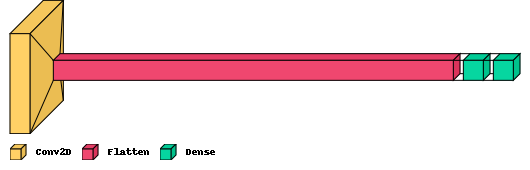

In [27]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(baseline_augmented_model, legend=True)

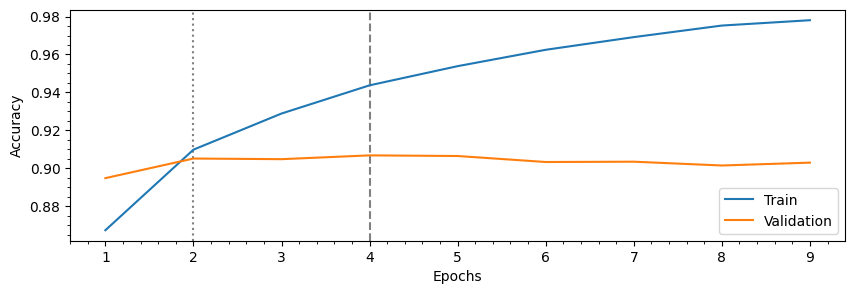

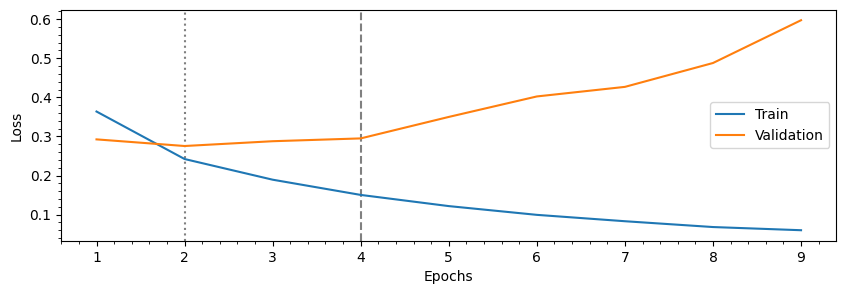

In [28]:
max_val_acc_epoch = np.argmax(list(baseline_augmented_history.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(baseline_augmented_history.history['val_loss']))+1
epochs = range(1, len(baseline_augmented_history.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,baseline_augmented_history.history['accuracy'], label='Train')
plt.plot(epochs,baseline_augmented_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,baseline_augmented_history.history['loss'], label='Train')
plt.plot(epochs,baseline_augmented_history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# baseline_augmented_model.save_weights("./models/fashion_baseline_augmented_model.h5")

In [31]:
own_augmented_model = Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),  
    layers.Conv2D(64, (3,3), activation="relu"),  
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Conv2D(64, (3,3), activation="relu"),  
    layers.BatchNormalization(),  
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(), # 2d to 1d
    layers.Dense(64, activation="relu"),
    layers.Dense(10)
])

own_augmented_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
print(own_augmented_model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/own_augmented.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/own_augmentedAcc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/own_augmentedLoss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
history_augmented = own_augmented_model.fit(x_train_augmented, y_train_augmented, 
                                                epochs=20, 
                                                validation_data=(x_val, y_val), 
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                rlrop, early_stop])

history_augmented

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)         

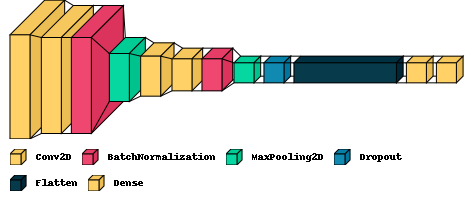

In [32]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(own_augmented_model, legend=True)

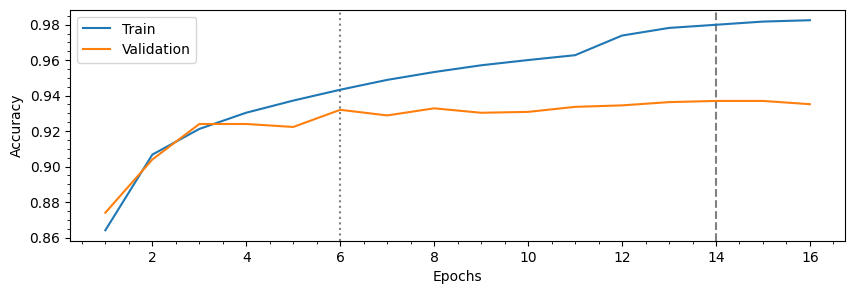

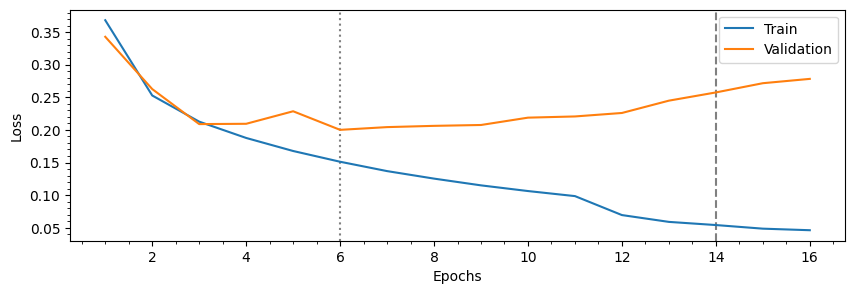

In [33]:
max_val_acc_epoch = np.argmax(list(history_augmented.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(history_augmented.history['val_loss']))+1
epochs = range(1, len(history_augmented.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,history_augmented.history['accuracy'], label='Train')
plt.plot(epochs,history_augmented.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,history_augmented.history['loss'], label='Train')
plt.plot(epochs,history_augmented.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# evaluating baseline coarse model
print(own_augmented_model.evaluate(x_test, y_test))
own_augmented_model.load_weights('tmp/checkpoint/own_augmentedAcc.hdf5')
scoreAcc = own_augmented_model.evaluate(x_test, y_test)
own_augmented_model.load_weights('tmp/checkpoint/own_augmentedLoss.hdf5')
scoreLoss = own_augmented_model.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2178 - accuracy: 0.9249
[0.21780414879322052, 0.9248999953269958]
313/313 [==============================] - 1s 4ms/step - loss: 0.2178 - accuracy: 0.9249
Best Acc Test Loss: 0.28441399335861206
Best Acc Test Accuracy: 93.25 %
Best Loss Test Loss: 0.21780414879322052
Best Loss Test Accuracy: 92.49000000000001 %


In [35]:
# own_augmented_model.save_weights("models/fashion-own-augmented-model.h5")

## Hyperparameter tuning

In [36]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1))), 
  # model.add(keras.layers.Flatten()),
  model.add(keras.layers.Conv2D(64, (3,3), activation="relu")),  
  model.add(keras.layers.BatchNormalization()),
  model.add(keras.layers.MaxPooling2D((2, 2))),
  model.add(keras.layers.Conv2D(64, (3,3), activation="relu")),
  model.add(keras.layers.Conv2D(64, (3,3), activation="relu")),  
  model.add(keras.layers.BatchNormalization()),  
  model.add(keras.layers.MaxPooling2D((2, 2))),
  model.add(keras.layers.Dropout(0.2)),
  model.add(keras.layers.Flatten()), # 2d to 1d
  model.add(keras.layers.Dense(64, activation="relu")),
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [37]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [38]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [39]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 192 and the optimal learning rate for the optimizer
is 0.001.



In [40]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.4494 - accuracy: 0.8344 - val_loss: 0.3478 - val_accuracy: 0.8782
Epoch 2/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2975 - accuracy: 0.8900 - val_loss: 0.2924 - val_accuracy: 0.8976
Epoch 3/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2578 - accuracy: 0.9053 - val_loss: 0.3025 - val_accuracy: 0.8903
Epoch 4/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2303 - accuracy: 0.9147 - val_loss: 0.2730 - val_accuracy: 0.8997
Epoch 5/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2106 - accuracy: 0.9230 - val_loss: 0.2470 - val_accuracy: 0.9144
Epoch 6/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1923 - accuracy: 0.9304 - val_loss: 0.2496 - val_accuracy: 0.9130
Epoch 7/20
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1779 - accuracy: 0.9340 - val_loss: 0.2443 - val_accuracy

In [41]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hyper.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hyperAcc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hyperLoss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
hypermodel_history = hypermodel.fit(x_train, y_train, 
                                                epochs=20, 
                                                validation_data=(x_test, y_test), 
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                EarlyStopping(monitor='val_accuracy', mode='max',patience=5)])
hypermodel_history

Epoch 1/20
1686/1688 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.8419
Epoch 1: saving model to tmp/checkpoint\hyper.hdf5

Epoch 1: val_accuracy improved from -inf to 0.86530, saving model to tmp/checkpoint\hyperAcc.hdf5

Epoch 1: val_loss improved from inf to 0.38874, saving model to tmp/checkpoint\hyperLoss.hdf5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4315 - accuracy: 0.8419 - val_loss: 0.3887 - val_accuracy: 0.8653
Epoch 2/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.8944
Epoch 2: saving model to tmp/checkpoint\hyper.hdf5

Epoch 2: val_accuracy did not improve from 0.86530

Epoch 2: val_loss improved from 0.38874 to 0.38297, saving model to tmp/checkpoint\hyperLoss.hdf5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2894 - accuracy: 0.8944 - val_loss: 0.3830 - val_accuracy: 0.8589
Epoch 3/20
1683/1688 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy

In [42]:
# evaluating baseline coarse model
print(hypermodel.evaluate(x_test, y_test))
hypermodel.load_weights('tmp/checkpoint/hyperAcc.hdf5')
scoreAcc = hypermodel.evaluate(x_test, y_test)
hypermodel.load_weights('tmp/checkpoint/hyperLoss.hdf5')
scoreLoss = hypermodel.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2971 - accuracy: 0.9219
[0.29713574051856995, 0.9218999743461609]
313/313 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9259
Best Acc Test Loss: 0.27455148100852966
Best Acc Test Accuracy: 92.66 %
Best Loss Test Loss: 0.22749421000480652
Best Loss Test Accuracy: 92.58999999999999 %


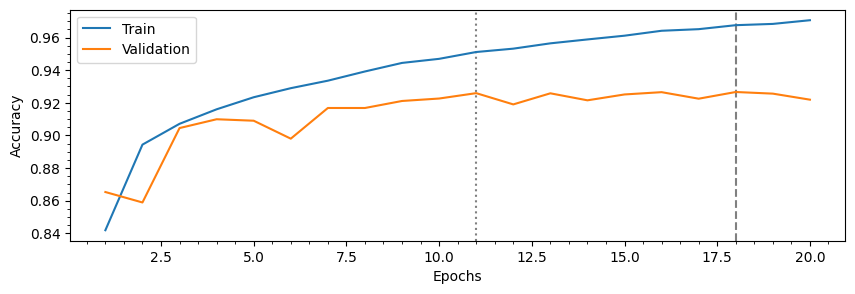

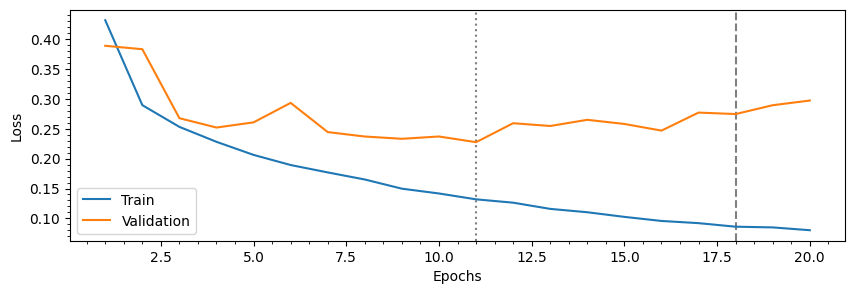

In [43]:
max_val_acc_epoch = np.argmax(list(hypermodel_history.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(hypermodel_history.history['val_loss']))+1
epochs = range(1, len(hypermodel_history.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,hypermodel_history.history['accuracy'], label='Train')
plt.plot(epochs,hypermodel_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,hypermodel_history.history['loss'], label='Train')
plt.plot(epochs,hypermodel_history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

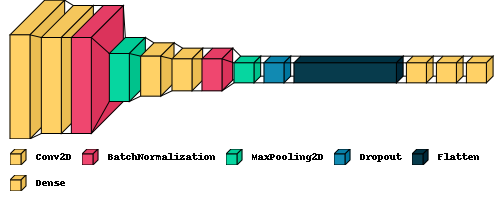

In [44]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(hypermodel, legend=True)

In [45]:
# hypermodel.save_weights("./tmp/fashion_hyper_model.h5")

In [46]:
tuner.search(x_train_augmented, y_train_augmented, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 192 and the optimal learning rate for the optimizer
is 0.001.



In [47]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_augmented, y_train_augmented, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
4050/4050 [==============================] - 27s 7ms/step - loss: 0.3871 - accuracy: 0.8568 - val_loss: 0.3646 - val_accuracy: 0.8636
Epoch 2/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.2686 - accuracy: 0.9005 - val_loss: 0.3152 - val_accuracy: 0.8856
Epoch 3/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.2311 - accuracy: 0.9146 - val_loss: 0.3294 - val_accuracy: 0.8786
Epoch 4/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.2078 - accuracy: 0.9236 - val_loss: 0.2720 - val_accuracy: 0.9018
Epoch 5/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.1886 - accuracy: 0.9297 - val_loss: 0.2590 - val_accuracy: 0.9045
Epoch 6/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.1738 - accuracy: 0.9350 - val_loss: 0.2636 - val_accuracy: 0.9010
Epoch 7/20
4050/4050 [==============================] - 26s 6ms/step - loss: 0.1618 - accuracy: 0.9400 - val_loss: 0.2295 - val_ac

In [48]:
hypermodel_augmented = tuner.hypermodel.build(best_hps)
checkpoint = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hypermodelAugmented.hdf5',verbose=True)
getAcc = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hypermodelAugmentedAcc.hdf5',verbose=True,save_best_only=True,monitor='val_accuracy')
getLoss = tf.keras.callbacks.ModelCheckpoint('tmp/checkpoint/hypermodelAugmentedLoss.hdf5',verbose=True,save_best_only=True,monitor='val_loss')
hypermodel_augmented_history = hypermodel_augmented.fit(x_train_augmented, y_train_augmented, 
                                                epochs=20, 
                                                validation_data=(x_test, y_test), 
                                                callbacks=[checkpoint,getAcc,getLoss, 
                                                EarlyStopping(monitor='val_accuracy', mode='max',patience=5)])
hypermodel_augmented_history

Epoch 1/20
5058/5063 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8614
Epoch 1: saving model to tmp/checkpoint\hypermodelAugmented.hdf5

Epoch 1: val_accuracy improved from -inf to 0.89290, saving model to tmp/checkpoint\hypermodelAugmentedAcc.hdf5

Epoch 1: val_loss improved from inf to 0.29069, saving model to tmp/checkpoint\hypermodelAugmentedLoss.hdf5
5063/5063 [==============================] - 33s 6ms/step - loss: 0.3771 - accuracy: 0.8615 - val_loss: 0.2907 - val_accuracy: 0.8929
Epoch 2/20
5056/5063 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9029
Epoch 2: saving model to tmp/checkpoint\hypermodelAugmented.hdf5

Epoch 2: val_accuracy improved from 0.89290 to 0.90220, saving model to tmp/checkpoint\hypermodelAugmentedAcc.hdf5

Epoch 2: val_loss improved from 0.29069 to 0.26559, saving model to tmp/checkpoint\hypermodelAugmentedLoss.hdf5
5063/5063 [==============================] - 31s 6ms/step - loss: 0.2658 - accuracy: 0.90

In [49]:
# evaluating baseline coarse model
print(hypermodel_augmented.evaluate(x_test, y_test))
hypermodel_augmented.load_weights('tmp/checkpoint/hypermodelAugmentedAcc.hdf5')
scoreAcc = hypermodel_augmented.evaluate(x_test, y_test)
hypermodel_augmented.load_weights('tmp/checkpoint/hypermodelAugmentedLoss.hdf5')
scoreLoss = hypermodel_augmented.evaluate(x_test, y_test)
print('Best Acc Test Loss:', scoreAcc[0])
print('Best Acc Test Accuracy:', round(scoreAcc[1],4)*100,'%')
print('Best Loss Test Loss:', scoreLoss[0])
print('Best Loss Test Accuracy:', round(scoreLoss[1],4)*100,'%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.9328
[0.25814372301101685, 0.9327999949455261]
313/313 [==============================] - 1s 4ms/step - loss: 0.2081 - accuracy: 0.9295
Best Acc Test Loss: 0.22726218402385712
Best Acc Test Accuracy: 93.51 %
Best Loss Test Loss: 0.20812790095806122
Best Loss Test Accuracy: 92.95 %


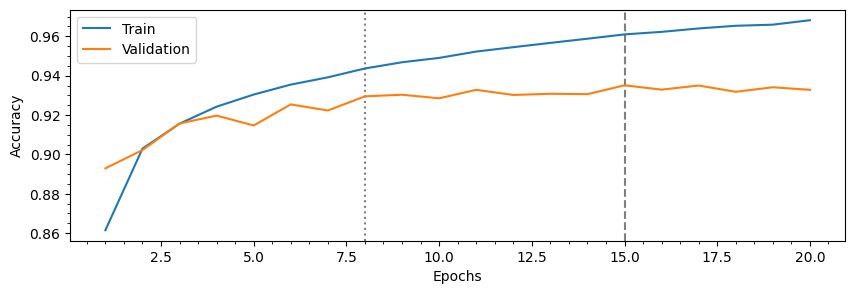

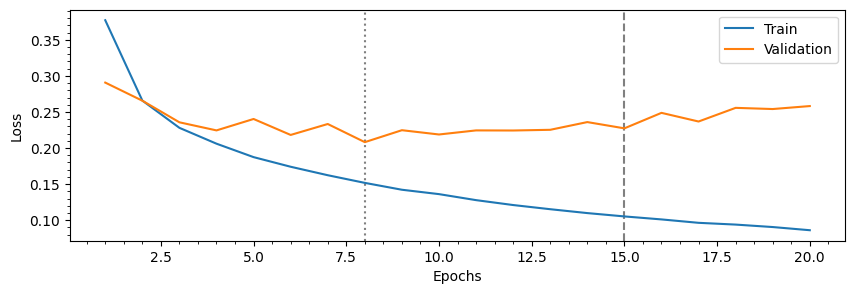

In [50]:
max_val_acc_epoch = np.argmax(list(hypermodel_augmented_history.history['val_accuracy']))+1
max_val_loss_epoch = np.argmin(list(hypermodel_augmented_history.history['val_loss']))+1
epochs = range(1, len(hypermodel_augmented_history.history['accuracy']) + 1)
plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,hypermodel_augmented_history.history['accuracy'], label='Train')
plt.plot(epochs,hypermodel_augmented_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.minorticks_on()
plt.axvline(x=max_val_acc_epoch, color='0.5', linestyle='--')
plt.axvline(x=max_val_loss_epoch, color='0.5', linestyle=':')
plt.plot(epochs,hypermodel_augmented_history.history['loss'], label='Train')
plt.plot(epochs,hypermodel_augmented_history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
# hypermodel.save_weights("./tmp/fashion_hyper_augmented_model.h5")

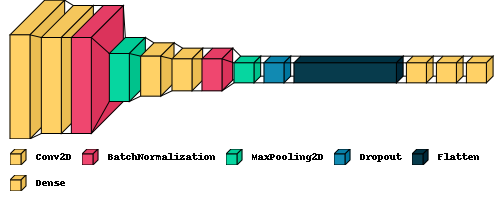

In [52]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(hypermodel_augmented, legend=True)